In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC

In [2]:
frame = pd.read_csv('features.csv')

In [3]:
frame.head()

,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Partials,MFCC,Duration,Zero_Crossings,Sex,Age,Species,Call
0,0.083313,0.015951,848.0,263.00,2,-10.254556,1,706,NaN,A,A. jubatus,growl
1,0.296424,0.035485,3645.5,452.25,21,-10.254556,4,3456,NaN,A,A. jubatus,NaN
2,0.171860,0.022913,2181.8,308.00,8,-10.254556,5,2984,NaN,A,A. jubatus,growl
3,0.243933,0.023587,3437.0,314.00,11,-10.254556,5,3108,NaN,A,A. jubatus,NaN
4,0.194653,0.029304,2189.0,331.00,5,-10.254556,3,1919,NaN,A,A. jubatus,growl


In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Amp_range       463 non-null    float64
 1   Avg_amp         463 non-null    float64
 2   Freq_range      463 non-null    float64
 3   Pulses_per_Sec  463 non-null    float64
 4   Partials        463 non-null    int64  
 5   MFCC            463 non-null    float64
 6   Duration        463 non-null    int64  
 7   Zero_Crossings  463 non-null    int64  
 8   Sex             342 non-null    object 
 9   Age             375 non-null    object 
 10  Species         463 non-null    object 
 11  Call            450 non-null    object 
dtypes: float64(5), int64(3), object(4)
memory usage: 43.5+ KB


In [5]:
frame.shape

(463, 12)

In [6]:
frame['Call'].unique()

array(['growl', nan, 'growl?', 'hiss', 'hiss?', 'call', 'unknown',
       'growl/hiss', 'call sequence', 'purr', 'purr sequence', 'Growl',
       'Hiss', 'Loud rumble/roar', 'Sharp Hiss', 'call?', 'roar',
       'roar or call', 'growl ', 'roar?', 'main call', 'call/growl',
       'Call sequence(possible mew)', 'mew', 'hiss ', 'call sequence?',
       'single call?', 'mew?', 'grow/hiss'], dtype=object)

In [7]:
clean = {'growl?': 'growl','Growl':'growl', 'growl ':'growl', 'hiss?':'hiss', 'Hiss':'hiss', 'Sharp Hiss':'hiss','unknown':np.NaN, 'purr sequence': 'purr',
        'Loud rumble/roar':'roar', 'call?':'call', 'main call':'call', 'call sequence':'call', 'roar or call':'roar', 'roar?':'roar', 'purr sequence':'purr', ' roar':'roar', 'hiss ':'hiss', 'mew?':'mew', 'Call sequence(possible mew)':'call', 'call sequence?':'call', 'single call?':'call', 'grow/hiss':'growl/hiss'}



In [8]:
print(frame['Age'].unique())
print(frame['Sex'].unique())

['A' 'Adult' 'Adult ' 'Juvenile ' 'juvenile' nan 'Juvenile']
[nan 'G (1 M and 2F)' 'P' 'F' 'Pair (Unknown)' 'Female ' 'Male' 'male '
 'G' 'Female' 'M' 'Unknown']


In [9]:
clean2 = {'A':'Adult','Adult ':'Adult', 'Juvenile ':'Juvenile', 'juvenile':'Juvenile'}
clean3 = {'Female ':'Female','F':'Female', 'M':'Male','male ':'Male', 'P':'Pair', 'Pair (Unknown)':'Pair', 'G':'Group', 'G (1 M and 2F)':'Group'}

In [10]:
frame.replace(clean, inplace = True)

In [11]:
frame.replace(clean2, inplace = True)

In [12]:
frame.replace(clean3, inplace = True)

In [13]:
frame['Sex'].fillna('Unknown', inplace = True)
frame['Age'].fillna('Unknown', inplace = True)

In [14]:
frame['Call'].unique()

array(['growl', nan, 'hiss', 'call', 'growl/hiss', 'purr', 'roar',
       'call/growl', 'mew'], dtype=object)

In [15]:
print(frame['Age'].unique())
print(frame['Sex'].unique())

['Adult' 'Juvenile' 'Unknown']
['Unknown' 'Group' 'Pair' 'Female' 'Male']


In [16]:
train = frame.loc[pd.notna(frame['Call'])]

In [17]:
train.to_csv('cleaned.csv', index=False)

In [18]:
x = train.iloc[:, 0:11]
y = train.iloc[:, 11]

In [19]:
x_dummies = pd.get_dummies(x)
x_dummies.describe()

,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Partials,MFCC,Duration,Zero_Crossings,Sex_Female,Sex_Group,...,Age_Unknown,Species_A. jubatus,Species_Bobcat,Species_C. temminckii,Species_Caracal Carcal,Species_Domestic Cat,Species_L. lynx,Species_L. serval,Species_Ocelot,Species_Wildcat
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,...,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,0.169752,0.018998,4430.050442,635.680592,7.400901,-16.747213,4.236486,7755.993243,0.135135,0.038288,...,0.184685,0.101351,0.022523,0.013514,0.067568,0.128378,0.171171,0.135135,0.254505,0.105856
std,0.150444,0.018126,3049.856175,645.413003,9.280753,8.626047,3.696185,9426.257629,0.342253,0.192108,...,0.388479,0.302134,0.148543,0.115590,0.251286,0.334888,0.377083,0.342253,0.436074,0.308000
min,0.003207,0.000551,1.000000,0.000000,0.000000,-29.455383,1.000000,281.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.054401,0.005026,2187.200000,228.875000,1.000000,-25.048552,2.000000,2499.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.139203,0.012967,3766.500000,402.892857,4.000000,-17.067156,3.000000,4587.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.237617,0.027690,6800.135621,762.068182,11.250000,-7.999763,5.000000,9489.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.980719,0.098279,10669.600000,3486.000000,79.000000,-3.730616,28.000000,73062.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_dummies, y, test_size = 0.30)

In [21]:
parameters = dict(
    objective='multi:softprob',
    random_state = 30,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist')

In [22]:
y_train.unique()

array(['growl', 'call', 'hiss', 'growl/hiss', 'roar', 'mew', 'call/growl',
       'purr'], dtype=object)

In [23]:
x.dtypes

Amp_range         float64
Avg_amp           float64
Freq_range        float64
Pulses_per_Sec    float64
Partials            int64
MFCC              float64
Duration            int64
Zero_Crossings      int64
Sex                object
Age                object
Species            object
dtype: object

In [24]:
clf = XGBClassifier(**parameters, n_estimators=1200)

In [25]:
clf.fit(x_train, y_train)

C:\Users\exant\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:36:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=30, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [26]:
y_pred = clf.predict(x_test)

In [27]:
clf.score(x_train, y_train)

1.0

In [28]:
clf.score(x_test,y_test)

0.8283582089552238

In [29]:
np.unique(y_pred)

array(['call', 'growl', 'hiss', 'purr', 'roar'], dtype=object)

In [30]:
np.unique(y_test)

array(['call', 'call/growl', 'growl', 'growl/hiss', 'hiss', 'mew', 'purr',
       'roar'], dtype=object)

In [31]:
np.unique(y_train)

array(['call', 'call/growl', 'growl', 'growl/hiss', 'hiss', 'mew', 'purr',
       'roar'], dtype=object)

In [32]:
gnb = GaussianNB()

In [33]:
gnb.fit(x_train, y_train)

GaussianNB()

In [34]:
y_pred_nb = gnb.predict(x_test)

In [35]:
gnb.score(x_test, y_test)

0.39552238805970147

In [36]:
clf_svc = SVC()

In [37]:
clf_svc.fit(x_train, y_train)

SVC()

In [38]:
y_pred_svc=clf_svc.predict(x_test)

In [39]:
clf_svc.score(x_test, y_test)

0.5298507462686567

In [40]:
y_pred

array(['call', 'growl', 'hiss', 'hiss', 'call', 'hiss', 'growl', 'growl',
       'growl', 'hiss', 'growl', 'hiss', 'growl', 'growl', 'call',
       'growl', 'growl', 'growl', 'growl', 'growl', 'growl', 'hiss',
       'growl', 'growl', 'growl', 'growl', 'growl', 'hiss', 'call',
       'call', 'growl', 'hiss', 'hiss', 'growl', 'call', 'call', 'growl',
       'call', 'growl', 'call', 'growl', 'growl', 'hiss', 'growl', 'roar',
       'growl', 'call', 'growl', 'growl', 'growl', 'call', 'growl',
       'call', 'call', 'call', 'call', 'growl', 'call', 'call', 'growl',
       'growl', 'growl', 'growl', 'call', 'growl', 'growl', 'growl',
       'growl', 'growl', 'roar', 'growl', 'hiss', 'call', 'call', 'call',
       'hiss', 'hiss', 'growl', 'growl', 'hiss', 'hiss', 'growl', 'growl',
       'growl', 'growl', 'call', 'call', 'growl', 'growl', 'growl',
       'growl', 'call', 'growl', 'growl', 'call', 'call', 'growl', 'call',
       'growl', 'growl', 'growl', 'growl', 'hiss', 'growl', 'growl',
  

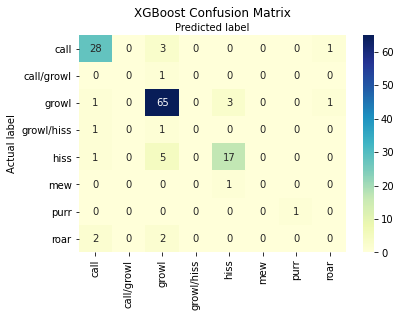

In [41]:
names = ['call', 'call/growl','growl','growl/hiss','hiss','mew','purr', 'roar']
cnf = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
sns.heatmap(cnf, annot = True, xticklabels = names, cmap= "YlGnBu", yticklabels = names)
ax.xaxis.set_label_position('top')
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

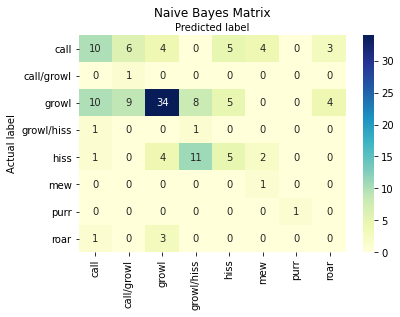

In [42]:
cnf = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
sns.heatmap(cnf, annot = True, xticklabels = names, cmap= "YlGnBu", yticklabels = names)
ax.xaxis.set_label_position('top')
plt.title('Naive Bayes Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

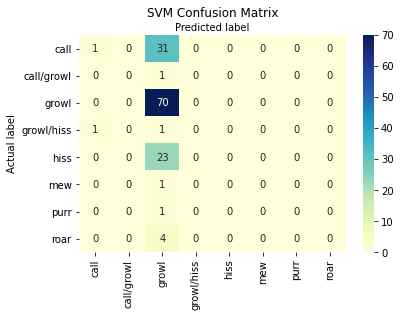

In [43]:
cnf = confusion_matrix(y_test, y_pred_svc)
fig, ax = plt.subplots()
tick_marks = np.arange(len(names))
sns.heatmap(cnf, annot = True, xticklabels = names, cmap= "YlGnBu", yticklabels = names)
ax.xaxis.set_label_position('top')
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
#The data is unbalanced, this could be fixed by updating the class weights 
#Or getting more varied data

In [45]:
frame['Call'].value_counts()

growl         233
call          106
hiss           63
roar           12
purr           11
mew             9
growl/hiss      6
call/growl      4
Name: Call, dtype: int64